<header>
        <div style="overflow: auto;">
    </div>
    <div style="text-align: center;">
        <h1> AMS Data1 </h1>
        <h2>Assignment 3: Housing</h2>
        <h6>&copy; Group 3 - Lena Gerstmans, Henrike Beckefeld & Tess van den Berg</h6>     
    </div>
    <br>   
    <br>
</header>

##### **Link back to our webstite:** *https://tessvdberg.github.io/thisisgroup3.github.io/*
##### **Link to our jupyter notebooks:** *https://github.com/Tessvdberg/thisisgroup3.github.io*

## Paralympics

Paris is hosting the Paralympics in 2024. One of the events at the Paralympics is an open water swimming event in the Seine (apparently the water is clean or so the French say). Since the City of Amsterdam thinks it is better than Paris, they want to host an event before the Paralympics, snubbing the Parisians. The idea is to host a 5km. open water swimming event through the canals of Amsterdam. You are asked by the municipality of Amsterdam to advise on the feasibility of the event from the perspective of the safety of the partaking athletes from an environmental perspective. The event is going to be hosted in May. 

In [4]:
#import libraries needed
import pandas as pd
import os.path
#import matplotlib.pyplot as plt
from geopy.geocoders import Nominatim
import plotly.express as px

#the files needed
bnb_csv = 'C:\\Users\\lgers\\OneDrive\\Documenten\\GitHub\\DATA1_Group3\\listings.csv'
bnb_df = pd.read_csv(bnb_csv)


#### Question 1 - What Amsterdam will receive from tourist tax if the event lasts a week and you will have 30.000 visitors?


#### Answer 1.

Amsterdam has strict regislation on tourist tax. For AirBNB, the tourist tax is 10% of the price per night. 
To calculate the answer, we assume the following:

- all 30.000 tourists stay in an Airbnb for 7 days
- every airbnb accomodates two persons
- The average price per night from workshop 4

Explanation on assumptions: 
- The Amsterdam Tourist tax differs between airbnb's and e.g. hotels. Since this assignment is about Airbnb, we assume all 30.000 tourists stay in an airbnb
- All 30.000 tourists stay for 7 nights. We don't know if people arrive earlier or later, or shorter. However, we assume that since it's a popular event the 30.000 people stay for a week.
- The types of rooms differ per airbnb, varying from private rooms to a full appartment. Hence, every airbnb can accommodate different numbers of people. Some people travel in groups, others travel alone. For the sake of the assignment we assume that on average, two people stay in an airbnb.
- The price per night varies when demand is higher (think of Christmas holidays or an sport event). However, since we don't have any data on that we use the average price per night as calculated in workshop 4. 

In [1]:

mean_price = 240.71
number_of_days = 7
number_of_airbnb = 15000
tax = 0.10 
tourist_tax = (mean_price * number_of_days * number_of_airbnb * tax)
print(f"The taxes received by the municipality: {tourist_tax} euro")

The taxes received by the municipality: 2527455.0 euro


#### Question 2 - Can you plot the amount of AirBnB locations per neighbourhood?


#### Answer 2.



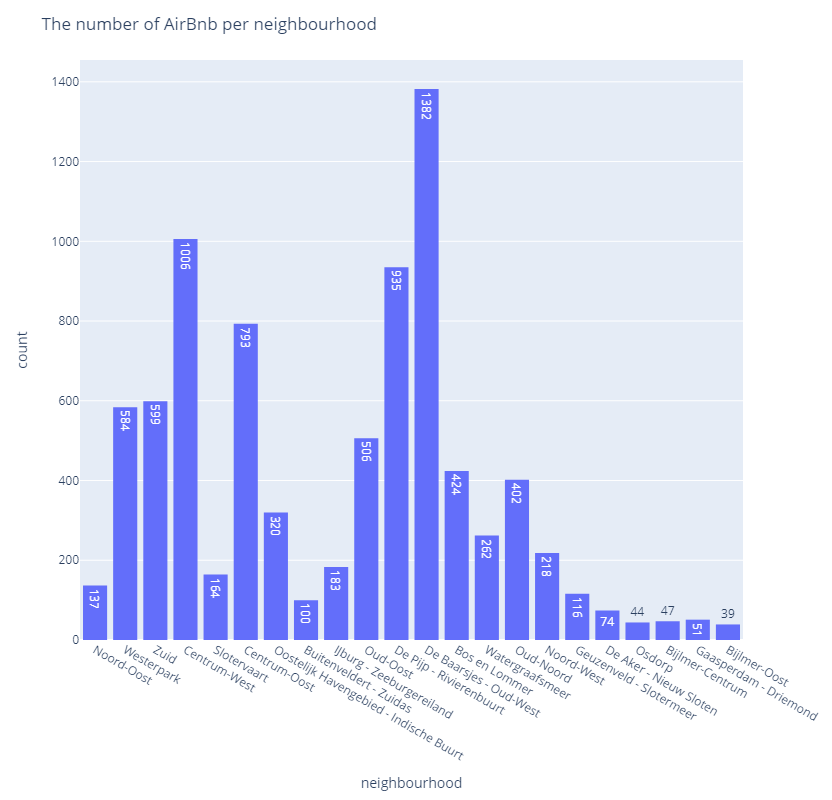

In [24]:
from plotly.express import histogram
bnb_csv = 'C:\\Users\\lgers\\OneDrive\\Documenten\\GitHub\\DATA1_Group3\\listings.csv'
bnb_df = pd.read_csv(bnb_csv)

fig = histogram(bnb_df, x="neighbourhood", text_auto=True)
fig.update_layout(
    height=800,
    title_text='The number of AirBnb per neighbourhood'
)

fig.show()

#### Question 3 - Which street in Amsterdam has the most appartments?

#### Answer 3. 


In [33]:
from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent="geoapiExercises")
latitude = bnb_df['latitude'][0]
longitude = bnb_df['longitude'][0]

location = geolocator.reverse((latitude, longitude))
print(location)

Gemaal Jisperveldstraat, Jisperveldstraat, Noord, Zunderdorp, Amsterdam, Noord-Holland, Nederland, 1024 BC, Nederland


In [34]:
from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent="geoapiExercises")
latitude = bnb_df['latitude'][1]
longitude = bnb_df['longitude'][1]

location = geolocator.reverse((latitude, longitude))
print(location)

82, Zoutkeetsplein, Zeeheldenbuurt, West, Amsterdam, Noord-Holland, Nederland, 1013 MR, Nederland


As you can see, the reverse geolocator can find the address out of the latitude and longitude. Unfortunately, you cannot do this as often in a legal way. When you would subscribe to a paid geolocater account, you can excecute the cell below in order to find the top 3 streets with most AirBnB's.

In [7]:
from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent="geoapiExercises")

reverse_geocoded_addresses = []
for index, row in bnb_df.iterrows():
    latitude = row['latitude']
    longitude = row['longitude']
    location = geolocator.reverse((latitude, longitude))
    reverse_geocoded_addresses.append(location.address)

# Add the reverse geocoded addresses as a new column in the DataFrame
bnb_df['reverse_geocoded_address'] = reverse_geocoded_addresses
reverse_geocoded_addresses_column = bnb_df['reverse_geocoded_address']

addresses = reverse_geocoded_addresses_column.str.split(',').str[1]
street_top3 = addresses.value_counts().sort_values(ascending=False).head(3)

#### Question 4 - Try to cross reference the data from the AirBnB dataset with the BBGA. 
- Can you figure 
out if all apartments of AirBnB are designated as housing
- Which number of apartments are not rented out all the time but are also used as normal housing?

Cross reference of the data:



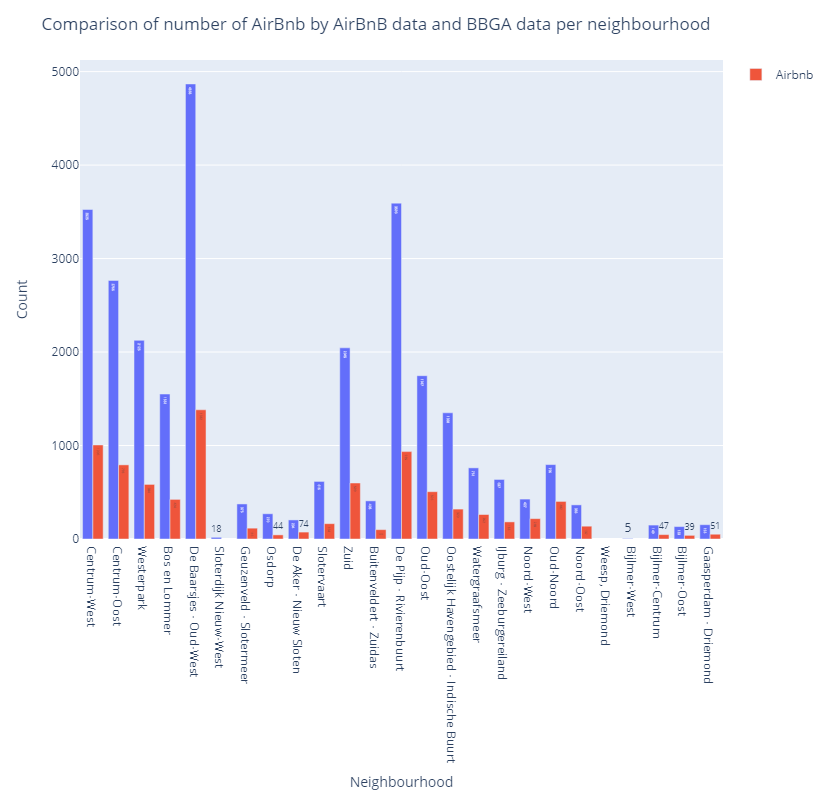

In [37]:
import pandas as pd
from plotly.express import bar

import pandas as pd
import plotly.express as px


bbga_xlsx = 'C:/Users/lgers/Documents/bbga/bbga_data.xlsx'  
bbga_data = pd.read_excel(bbga_xlsx)
bnb_csv = 'C:\\Users\\lgers\\OneDrive\\Documenten\\GitHub\\DATA1_Group3\\listings.csv'
bnb_df = pd.read_csv(bnb_csv)

bbga_airbnb_df = bbga_data[['gebiednaam', 'sdnaam', 'BHVESTAIRBNB']]
bbga_airbnb_df_neighbourhood = bbga_airbnb_df.iloc[3937:3962]
bbga_airbnb_df_neighbourhood.to_csv("bbga_data_needed.csv", index=False)
bbga_data_needed_df = pd.read_csv('bbga_data_needed.csv')
bbga_data_needed_df['gebiednaam'].replace({
    "Oud West, De Baarsjes": "De Baarsjes - Oud-West",
    "De Pijp, Rivierenbuurt": "De Pijp - Rivierenbuurt",
    "Indische Buurt, Oostelijk Havengebied": "Oostelijk Havengebied - Indische Buurt",
    "IJburg, Zeeburgereiland": "IJburg - Zeeburgereiland",
    "Geuzenveld, Slotermeer": "Geuzenveld - Slotermeer",
    "Buitenveldert, Zuidas": "Buitenveldert - Zuidas",
    "Oud-Zuid": "Zuid",
    "De Aker, Sloten, Nieuw-Sloten": "De Aker - Nieuw Sloten",
    "Gaasperdam": "Gaasperdam - Driemond"
}, inplace=True)

# Rename the column in bnb_df to match the one in bbga_data_needed_df
bnb_df.rename(columns={"neighbourhood": "gebiednaam"}, inplace=True)

bnb_bar_df = bnb_df['gebiednaam'].value_counts().reset_index().rename(columns={'index': 'gebiednaam', 0 : 'count'})


graph = px.bar(bbga_data_needed_df, x='gebiednaam', y='BHVESTAIRBNB', text='BHVESTAIRBNB', barmode='group', labels={'BHVESTAIRBNB': 'BBGA'})
graph.add_bar(x=bnb_bar_df['gebiednaam'], y=bnb_bar_df['count'], text=bnb_bar_df['count'], name='Airbnb')

# Update the layout
graph.update_layout(
    height=800,
    title_text='Comparison of number of AirBnb by AirBnB data and BBGA data per neighbourhood',
    xaxis_title='Neighbourhood',
    yaxis_title='Count'
)

# Show the plot
graph.show()

#### Answer 4. 

As seen in the graph above, cross-referencing the data of AirBnB and the BBGA leads to large differences.According to the BBGA, there are many more houses which are rented out as AirBnb (at least once per year) than according to the AirBnB data. 

In the BBGA, the designation of buildings based on latitude/longitude could not be found. Therefore, we cannot figure out if all AirBnB's are designated as housing.

To check whether AirBnB's are also used as housing, we assume that people live in the house when the AirBnB is not available. Hence, we look at the column of availability per year.  This column gives us the number of days a listing is available out of 365 days. We assume an apartment can only be designated as housing when it is a full apartment/home. 

In the municipality of Amsterdam, you can only rent out your private house for a maximum of 30 days per year. Otherwise, you need a different permit and you cannot live in the house as if it is your own (AirBnB). Therefore, we assume that all AirBnB's (full house/appartment) which are available 30 days or less per year are used as housing.



In [39]:
bnb_csv = 'C:\\Users\\lgers\\OneDrive\\Documenten\\GitHub\\DATA1_Group3\\listings.csv'
bnb_df = pd.read_csv(bnb_csv)
filtered_rows = bnb_df[(bnb_df['room_type'] == 'Entire home/apt') & (bnb_df['availability_365'] <= 30)]

bnb_used_as_housing = len(filtered_rows)
print("The number of AirBnB's which are also used as housing:", bnb_used_as_housing)

The number of AirBnB's which are also used as housing: 4026


As the total number of AirBnB (according to the data of AirBnB) is 8386, almost half of the AirBnB's are full home/appartments available less or equal than 30 days a year. This means that almost half of the AirBnB's are used for normal housing according to the rules of the municipality.

#### Question 5 - How many hotel rooms should be built if Amsterdam wants to accommodate the same number of tourists?

#### Answer 5. 
This question is interpreted as if Amsterdam wants to accomodate the same number of tourists, but cannot use Airbnbn anymore, since it needs to be used for normal housing. 
Therefore, we first calculated the average number of beds in hotelrooms using BBGA data:

In [26]:

hotelbeds_total = 76823
hotelrooms_total = 34758
average_beds_in_hotel = hotelbeds_total / hotelrooms_total
print(f'The average number of beds per hotel room : {average_beds_in_hotel}')


The average number of beds per hotel room : 2.2102249841763046



With the average number of beds per hotel room, we can now make up for the 'missing' beds that we would have if there was no Airbnb anymore. 

In [29]:

detail_name = bnb_df['name'].str.split('·', expand=True)
detail_name.columns = ['property', 'rating', 'bedrooms', 'beds', 'baths']
number_beds = detail_name['beds'].str.extract('([\d.]+)').astype(float)
all_beds_airbnb = number_beds[0].sum()
print(f'Total number of beds in airbnb: {int(all_beds_airbnb)}')
new_rooms = all_beds_airbnb / average_beds_in_hotel
print(f'Total number of new hotel rooms needed: {int(new_rooms)}')



Total number of beds in airbnb: 14713
Total number of new hotel rooms needed: 6657


#### Question 6 - How many different licenses are issued??

In [37]:
print(f"The number of different liceses issued: {bnb_df['license'].nunique()}")

The number of different liceses issued: 7288


##### **Link back to our webstite:** *https://tessvdberg.github.io/thisisgroup3.github.io/*

## Links and References

Hotels in metropoolregio Amsterdam. (z.d.). Gemeente Amsterdam. https://data.amsterdam.nl/datasets/smyIEaiLR6uRlg/hotels-in-metropoolregio-amsterdam/?term=Hotels+in+metropoolregio+Amsterdam

Toeristenbelasting. (z.d.). Gemeente Amsterdam. https://www.amsterdam.nl/veelgevraagd/toeristenbelasting-2c7c2

Amsterdam - Airbnb helpcentrum. (z.d.). Airbnb. https://www.airbnb.nl/help/article/860#:~:text=Volgens%20de%20Nederlandse%20wetgeving%20kun,zoals%20een%20vergunning%20voor%20kortetermijnverhuur

Link to our github: https://github.com/Tessvdberg/thisisgroup3.github.io 

<div style="text-align: center;">
        <h6>&copy; Group 3 - Lena Gerstmans, Henrike Beckefeld & Tess van den Berg</h6>     
    </div>